<a href="https://colab.research.google.com/github/lu-sketch/EDA-Global-Meat-Consumption/blob/main/meat_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Trends in Meat Consumption**
## **Interactive visual analysis**




<img src= "1vudsuVfy0ULFRcdumSgAvseSNYn3YHs7">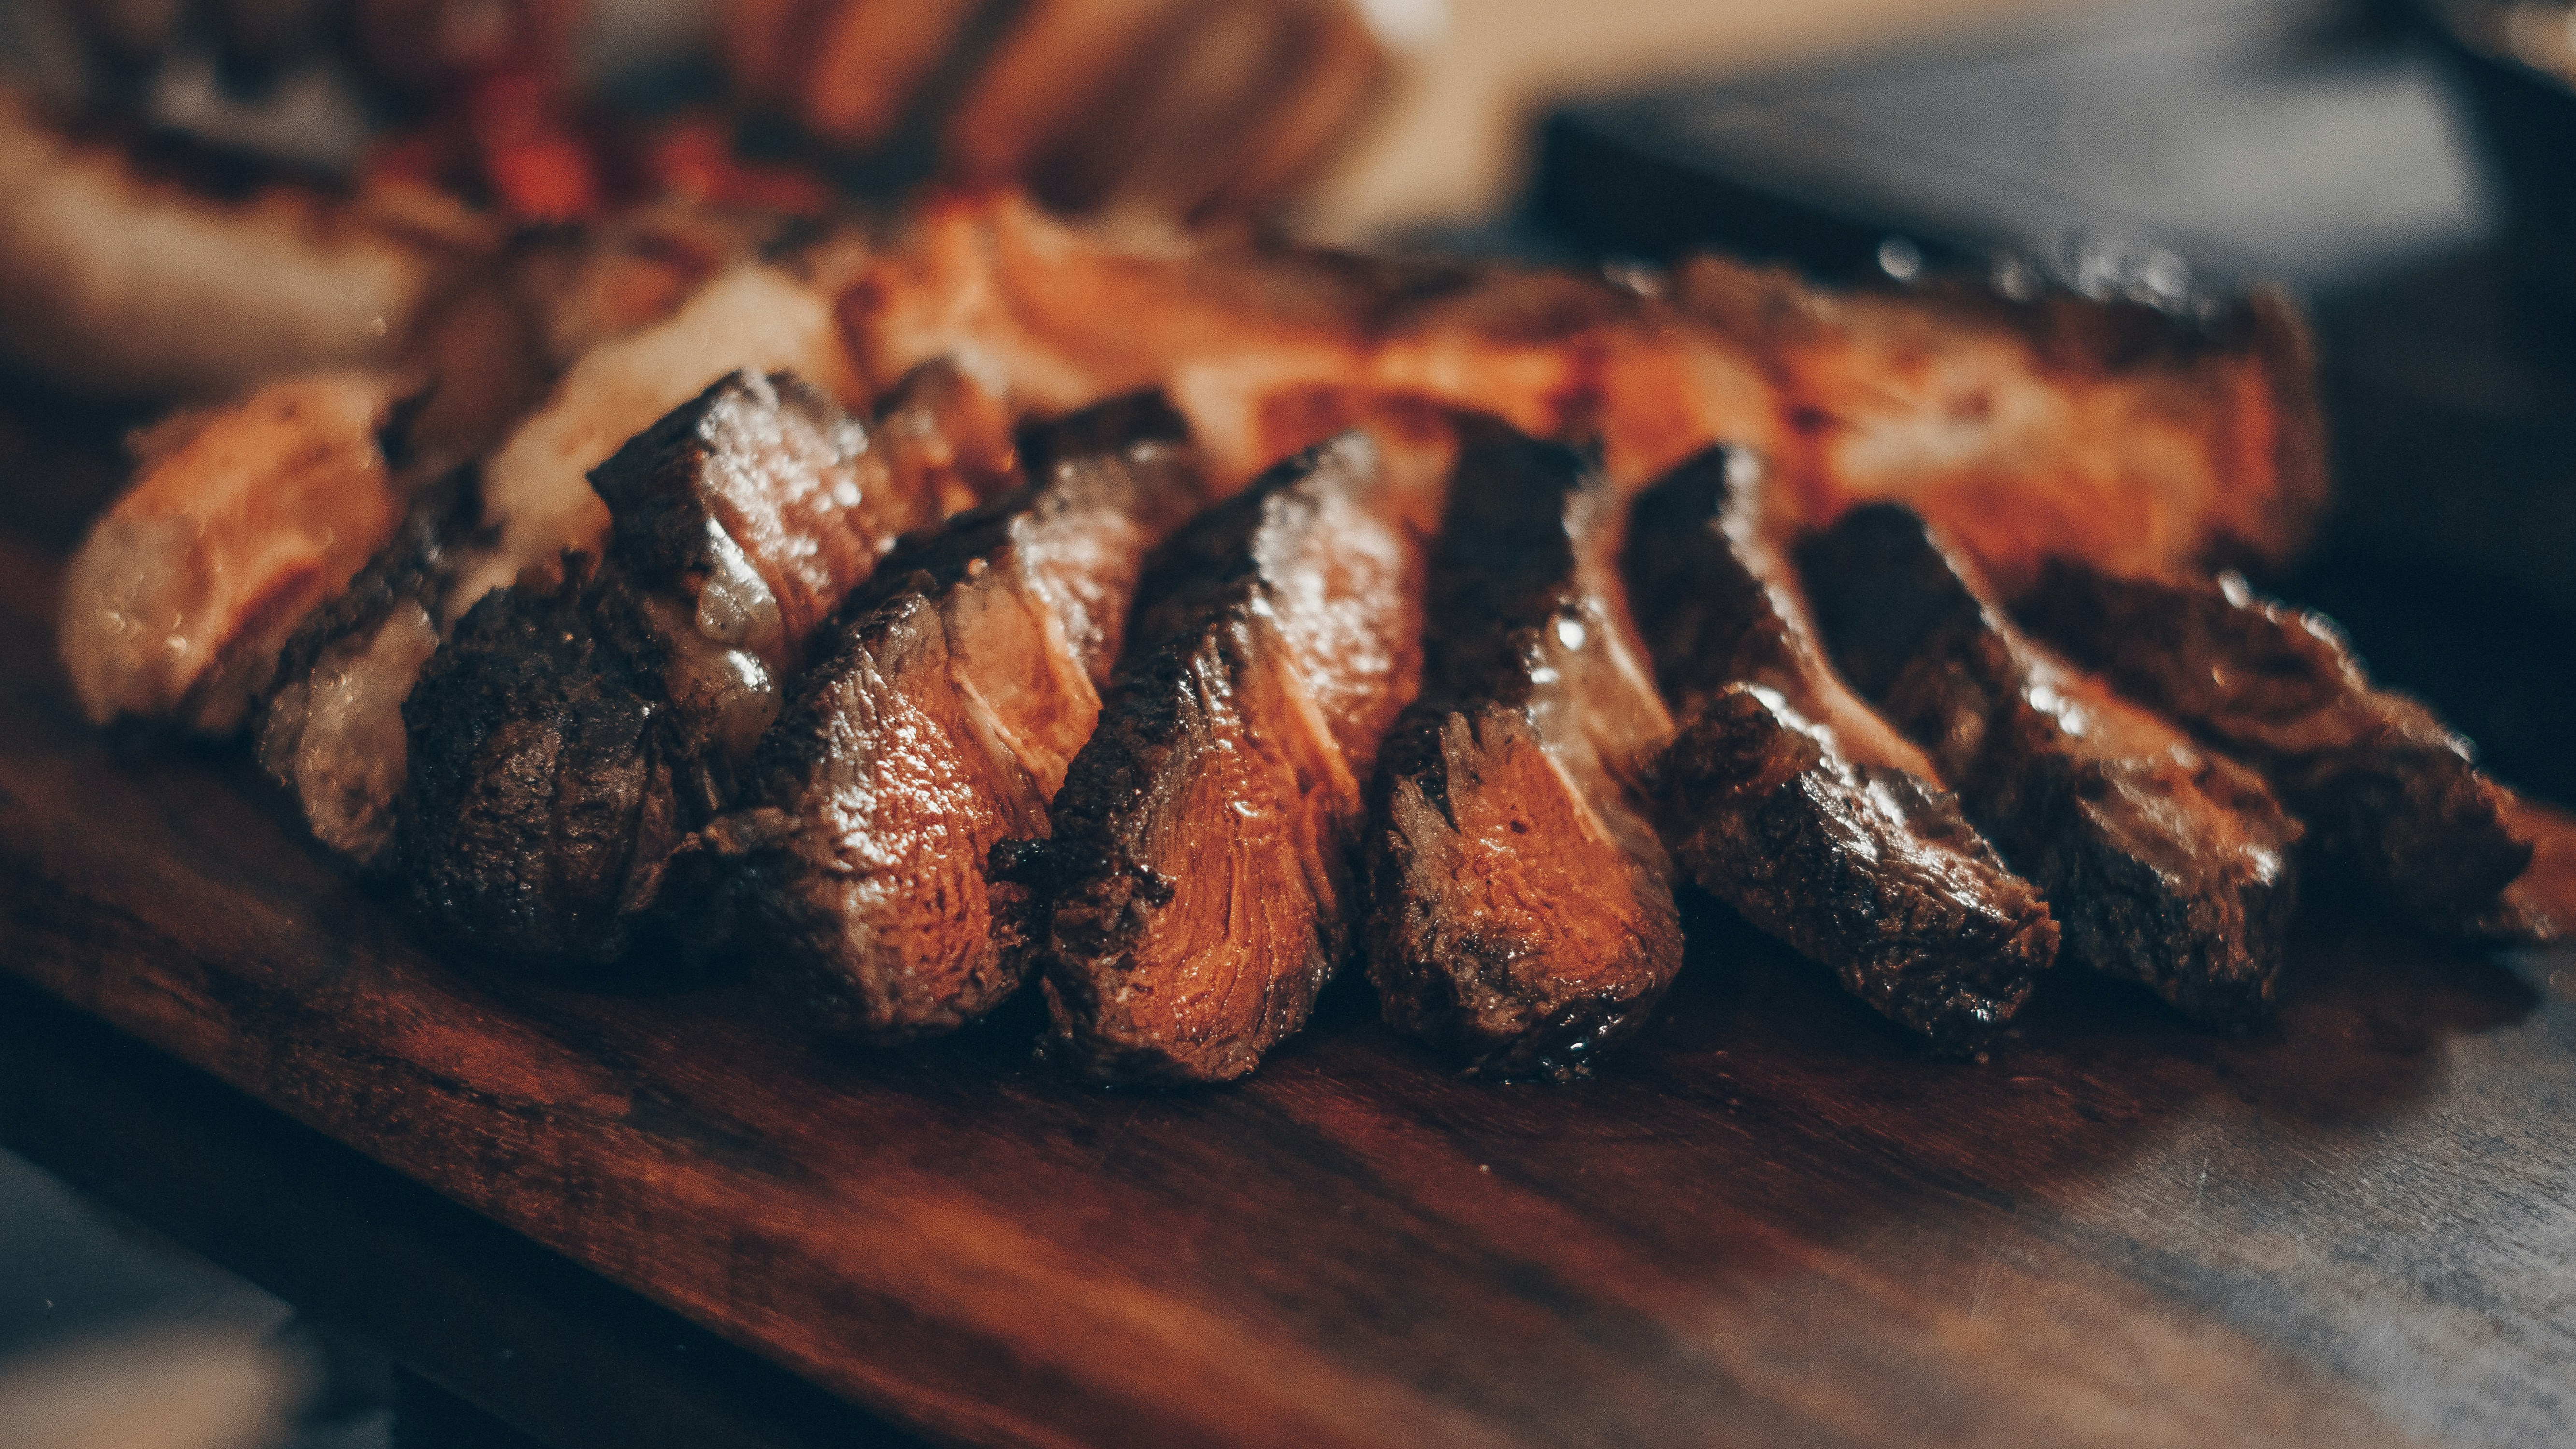

## **Purpose of this analysis**;
🐄The goal here is to study the trends of global meat consumption.
The data will show meat consumption per country, meat-type and value of meat consumption.🌍
At the end we would like to determine the global trend of meat consumption. 🐏
This can be of value to meat importing, producing and exporting countries.
With studying the trends in meat consumption by type, this can help meat farmers/producers determine production inputs.🐖

**Columns description:**

* LOCATION = the country code name
* SUBJECT = The type of meat(pig, beef, etc)
* TIME = the year the data was recorded
* MEASURE = the measure used to show the value
* VALUE = The value, according to the measure



# **Table of Contents**
1. Data Processing and cleaning
2. Our data story
3. A South African perspective
4. Economic perspective of GDP value
5. Concluding remarks

# **1. Data processing and cleaning**

The original data were downloaded from:   <a href="https://www.kaggle.com/datasets/vagifa/meatconsumption">
<button>Worldwide Meat Consumption</button></a>


## **World Map**

In [1]:
# importing libraries
import pandas as pd
import numpy as np

# visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Plotly Library
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML
sns.set_style(style = 'whitegrid')

# warnings
import warnings
warnings.filterwarnings("ignore")

# showing graphs inline
%matplotlib inline


The data file was imported directly from my **GitHub** repository.
The data can be found **here**;
<a href="https://github.com/lu-sketch/EDA-Global-Meat-Consumption" ><button>GitHub Repo</button></a>


In [2]:
# Reading the data from Github repository using the data url
data = pd.read_excel('https://github.com/lu-sketch/EDA-Global-Meat-Consumption/raw/main/world_meat_consumption.xlsx')
data.head()

LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME      Value
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000004
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.808401
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.278166
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.244478
4      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.541244

In [3]:
# Looking at our data set - columns, null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   12140 non-null  object 
 1   INDICATOR  12140 non-null  object 
 2   SUBJECT    12140 non-null  object 
 3   MEASURE    12140 non-null  object 
 4   FREQUENCY  12140 non-null  object 
 5   TIME       12140 non-null  int64  
 6   Value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


Here we can see that only 2 columns contains numerical data.
Our column for 'Year' and 'Value' of meat consumption. The other columns are object data (Country names and meat type).

In [4]:
# Statistical overview of the data
data.describe()

TIME         Value
count  12140.000000  1.214000e+04
mean    2009.042175  2.245855e+03
std       11.233660  1.040812e+04
min     1990.000000  7.505681e-08
25%     1999.000000  5.013586e+00
50%     2009.000000  2.427455e+01
75%     2019.000000  4.355984e+02
max     2028.000000  1.402526e+05

In [5]:
# Here we used the .copy() from Pandas.
# Creating a copy of our original data set, so to not alter it when changes are
# being made, thus the reason for a copy.

meat_data = data.copy()
meat_data.head()

LOCATION    INDICATOR SUBJECT MEASURE FREQUENCY  TIME      Value
0      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1990   0.000004
1      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1991  27.808401
2      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1992  26.278166
3      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1993  26.244478
4      AUS  MEATCONSUMP    BEEF  KG_CAP         A  1994  25.541244

In [6]:
# Looking if we have duplicate data values
meat_data.duplicated().sum()

0

In [7]:
# Determining if there are null values
meat_data.isnull().sum()

LOCATION     0
INDICATOR    0
SUBJECT      0
MEASURE      0
FREQUENCY    0
TIME         0
Value        0
dtype: int64

Great, no null values 😊

# 2. **Our Data Story**



### **Overview of Economic Blocks** 🌍
In this analysis, we will explore the following economic blocks and their constituent countries:

- **SSA** (Sub-Saharan Africa) 🌿:
A region of Africa situated south of the Sahara Desert, encompassing a diverse range of countries with varying economic conditions.

- **BRICS** 🌐:
An association of major emerging economies comprising Brazil 🇧🇷, Russia 🇷🇺, India 🇮🇳, China 🇨🇳, and South Africa 🇿🇦. This group focuses on fostering economic cooperation and development.

- **EU28** 🇪🇺:
Refers to the European Union with 28 member countries prior to Brexit, when the United Kingdom 🇬🇧 was still part of the Union. The EU28 represents a significant economic and political bloc in Europe.

- **OECD** 📈:
The Organisation for Economic Co-operation and Development, a group of 38 member countries primarily composed of high-income economies. The OECD aims to promote policies that improve the economic and social well-being of people around the world.<br>



Now, let us begin with visualising 🎊
Let us use visualisations to analyze this data set and see the trends and patterns.📊<br>

The python interactive library 📈 <a href="https://plotly.com/python/plotly-fundamentals/"><button>Python - Plotly</button></a> was used for creating our interactive graphs. 📉





### **Worldwide map showing BEEF consummption over time**

In [8]:
# Creating a timeline worldmap showing BEEF consumption over time

# Load the data from the GitHub repo
meat_data = pd.read_excel('https://github.com/lu-sketch/EDA-Global-Meat-Consumption/raw/main/world_meat_consumption.xlsx')

# Filter for BEEF
beef_data = meat_data[meat_data['SUBJECT'] == 'BEEF']

# Add latitude and longitude for countries
country_coords = {
    'ZAF': {'lat': -30.5595, 'lon': 22.9375},
    'USA': {'lat': 37.0902, 'lon': -95.7129},
    'BRA': {'lat': -14.2350, 'lon': -51.9253},
    'ARG': {'lat': -38.4161, 'lon': -63.6167},
    'IND': {'lat': 20.5937, 'lon': 78.9629},
    'CHN': {'lat': 35.8617, 'lon': 104.1954},
    'AUS': {'lat': -25.2744, 'lon': 133.7751},
    'RUS': {'lat': 61.5240, 'lon': 105.3188}
}

# Map the country codes to lat/lon
beef_data['lat'] = beef_data['LOCATION'].map(lambda x: country_coords.get(x, {}).get('lat'))
beef_data['lon'] = beef_data['LOCATION'].map(lambda x: country_coords.get(x, {}).get('lon'))

# Drop rows without lat/lon information
beef_data = beef_data.dropna(subset=['lat', 'lon'])


fig = px.scatter_geo(beef_data,
                     lat='lat',
                     lon='lon',
                     color='Value',
                     hover_name='LOCATION',
                     size='Value',
                     animation_frame='TIME',
                     title='Global BEEF Consumption Over Time')

#
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='rgb(229, 229, 229)',
        countrycolor='rgb(255, 255, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(255, 255, 255)',
    )
)

fig.show()
print("""
🔍'Press Play' to see the change in BEEF
consumption over time.🌍""")


🔍'Press Play' to see the change in BEEF
consumption over time.🌍


In [9]:
# Showing Worldwide Meat Consumption over Time
data = meat_data[meat_data['LOCATION'] == 'WLD']
fig = px.scatter(data,x="TIME", y="Value", hover_name='SUBJECT',hover_data=['MEASURE'],color='SUBJECT',symbol='LOCATION',
                title='Value of Worldwide Meat Consumption over Time')
HTML(fig.to_html())
fig.show()

In [10]:
# Overview of Meat Consumption Trends for top 5 countries:

# Filter the countries
top_countries = ['USA', 'BRA', 'CHN', 'IND', 'AUS']  # Example top 5 countries
filtered_data = meat_data[meat_data['LOCATION'].isin(top_countries)]

# Faceted Plot (Grid Showing Consumption over Time per Country)
fig = px.line(filtered_data,
              x="TIME",
              y="Value",
              color="SUBJECT",
              facet_col='LOCATION',
              facet_col_wrap=3,
              markers=True,
              title='Meat Consumption Grid Over Time: (Top 5 Countries)')

# Update layout for vibrant colors, white grids, and better legend position
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
        legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        title=dict(text="Meat Type")
    ),
    colorway=px.colors.qualitative.Bold,  # Vibrant colors
    hovermode='x unified'
)


fig.show()


fig = make_subplots()

for country in top_countries:
    country_data = filtered_data[filtered_data['LOCATION'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['TIME'], y=country_data['Value'], mode='lines+markers', name=country))


fig.update_layout(
    title='Meat Consumption (Top 5 Countries)',
    xaxis_title='Time',
    yaxis_title='Meat Consumption',
    showlegend=True,
    plot_bgcolor='white',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    legend=dict(
            orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        title=dict(text="Country") ),
    colorway=px.colors.qualitative.Bold  # Vibrant colors
)

# Show the line graph
fig.show()


In [11]:
# Consumption over time: Economic Blocks - Percantage and over time:

# Filter the Economic blocks
data = {'LOCATION': ['SSA', 'BRICS', 'EU28', 'OECD'],
        'Value': [250, 200, 150, 100]}

meatdata = pd.DataFrame(data)

# Pie Chart
fig_pie = px.pie(meatdata, values='Value', names='LOCATION',
                 )

fig_pie.update_traces(
    pull=[0.1, 0.1, 0.1, 0.1],
    marker=dict(line=dict(color='black', width=2)),
    textinfo='label+percent',
    texttemplate='<b>%{label}</b><br><b>%{percent}</b>',
    textposition='inside',
    textfont=dict(color='white')
)

time_series_data = {
    'TIME': ['1990', '1995', '2000', '2005', '2010', '2015', '2020', '2022', '2023', '2024'] * 4,
    'LOCATION': ['SSA']*10 + ['BRICS']*10 + ['EU28']*10 + ['OECD']*10,
    'Value': [240, 245, 250, 255, 260, 265, 270, 275, 280, 285,   # SSA
              180, 185, 190, 195, 200, 205, 210, 215, 220, 225,   # BRICS
              140, 145, 150, 155, 160, 165, 170, 175, 180, 185,   # EU28
              90, 95, 100, 105, 110, 115, 120, 125, 130, 135]     # OECD
}

time_data = pd.DataFrame(time_series_data)

# Line Graph
fig_line = px.line(time_data,
                   x='TIME',
                   y='Value',
                   color='LOCATION',
                   markers=True,
                   )

fig_line.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    colorway=px.colors.qualitative.Bold
)

# Display the pie chart and line graph
fig_combined = make_subplots(rows=1, cols=2, subplot_titles=("Meat Consumption: Economic block","Meat Consumption Over Time"),
                             specs=[[{"type": "pie"}, {"type": "xy"}]])

# Add pie chart
fig_combined.add_trace(go.Pie(labels=meatdata['LOCATION'], values=meatdata['Value'],pull=[0.1, 0.1, 0.1, 0.1], marker=dict(line=dict(color='black', width=2))), row=1, col=1)

# Add line graph
for location in time_data['LOCATION'].unique():
    country_data = time_data[time_data['LOCATION'] == location]
    fig_combined.add_trace(go.Scatter(x=country_data['TIME'], y=country_data['Value'], mode='lines+markers', name=location), row=1, col=2)

# Customize layout
fig_combined.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='white'),
    yaxis=dict(gridcolor='white'),
    colorway=px.colors.qualitative.Bold,
    legend=dict(orientation="h", yanchor="top", y=1.02, xanchor="center", x=0.5),
)

fig_combined.show()


In [12]:
# Showing Consumption by Meat Type - Top 10 countries:

# Filter the data for only the top 10 countries
# Bar plot for each meat type
meat_types = meat_data['SUBJECT'].unique()

# List of countries
selected_countries = ['USA', 'BRA', 'ARG', 'IND', 'CHN', 'ZAF', 'AUS', 'JPN', 'KOR', 'RUS']

# Filter the data
filtered_meat = meat_data[meat_data['LOCATION'].isin(selected_countries)]

# Loop through each meat type and create a bar chart
for meat_type in meat_types:
    meat_type_data = filtered_meat[filtered_meat['SUBJECT'] == meat_type]


    fig = px.bar(meat_type_data, x='LOCATION', y='Value', color='LOCATION')
    fig.update_layout(
        title=dict(
            text=f"Top 10 Countries' Consumption by: {meat_type}",
            x=0.5,
            xanchor='center',
            font=dict(
                family='Arial',
                size=18,
                color='black'
            )
        ),
           legend=dict(
        orientation="h",
        yanchor="top",
        y=1.02,
        xanchor="center",
        x=0.5,
        title=dict(text="Countries") ),
        xaxis_title='Country',
        yaxis_title='Meat Consumption (thousand t\ carcass weight)',
        font=dict(size=14)
    )


    fig.show()


In [13]:
# Pie chart for proportions of consumption by Meat type
by_c = meat_data.groupby('SUBJECT')[['Value']].sum().reset_index().sort_values('Value', ascending=False)

# Create the Plotly pie chart
fig = px.pie(by_c, values='Value', names='SUBJECT',
             title="Proportion Consumption: Meat Type",
             hole=0)  #


fig.update_traces(textposition='inside', textinfo='percent+label',
                  pull=[0.1, 0.1, 0.1, 0.1],
                  marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_x=0.5,  # Center the title
    title_font=dict(size=16, family='Arial, bold'),
    margin=dict(t=50, b=50, l=50, r=50),
)

fig.show()

In [14]:
# Meat Consumption Change through the Years
fig = px.scatter(meat_data, x="TIME", y="Value", hover_name='LOCATION',hover_data=['MEASURE'],color='SUBJECT',title='Meat Consumption Change through the Years')
HTML(fig.to_html())
fig.show()

In [15]:
# Economic blocks: Meat Consumption trends

# Filter out the economic blocks
data = {'LOCATION': ['SSA', 'BRICS', 'EU28', 'OECD'],
        'Value': [250,200,150, 100]}

meatdata = pd.DataFrame(data)

# Aggregate the data to get total consumption per country
total_consumption = meatdata.groupby('LOCATION')['Value'].sum().reset_index()

# Sort the data to get the top 10 countries
top_10_countries = total_consumption.nlargest(10, 'Value')

# Create the initial pie chart using Plotly Express
fig = px.pie(top_10_countries, values='Value', names='LOCATION',
             title='Economic blocks by Consumption')


fig.update_traces(
    pull=[0.1, 0.1, 0.1, 0.1],
    marker=dict(line=dict(color='black', width=2)),
    textinfo='label+percent',
    texttemplate='<b>%{label}</b><br><b>%{percent}</b>',  # Customize the text template
    textposition='inside',
    textfont=dict(color='white'),
    hovertemplate='<b>%{label}</b><br><b>%{percent}</b>'
)

fig.show()



In [16]:
# Meat consumption per meat type distribution over Time:

# Creating the box plots
fig = px.box(meat_data, x='LOCATION', y='Value', color='SUBJECT',
             facet_col='SUBJECT', facet_col_wrap=2,
             points='all')


fig.update_layout(
    title_text='Distribution of Meat Consumption by Type',
    title_x=0.5,
    xaxis_title='Country',
    yaxis_title='Value Meat Consumption',
    font=dict(size=16, family='Arial', color='black'),
    legend=dict(title="Meat Type"),
    height=800, width=1000,
)

fig.show()


In [17]:
# Showing consumption habits per meat type over time:

# Create a figure with subplots
meat_data['Year_Period'] = pd.cut(meat_data['TIME'], bins=[1990, 1995, 2005, 2010, 2015, 2025],
                                  labels=['1991-1995', '1996-2005', '2006-2010', '2011-2015', '2021-2025'])

# Define a custom color sequence
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=meat_data['SUBJECT'].unique(),
                    shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.1, horizontal_spacing=0.1)

# Meat types
meat_types = meat_data['SUBJECT'].unique()

# Add a bar chart for each meat type
for i, meat_type in enumerate(meat_types):
    row = i // 2 + 1
    col = i % 2 + 1
    data_for_meat_type = meat_data[meat_data['SUBJECT'] == meat_type]

    fig.add_trace(
        go.Bar(x=data_for_meat_type['Year_Period'], y=data_for_meat_type['Value'], name=meat_type,
               marker_color=color_sequence[i % len(color_sequence)]),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title_text='Meat Consumption Habits over time: Meat Type',
    title_x=0.5,
    font=dict(size=16, family='Arial', color='black'),
    height=800, width=1000,
    showlegend=False
)

fig.show()


In [18]:
# Historical, past 30 years: Meat Consumption Habits over time

# Grouping years inot time brackets
fig = make_subplots(rows=1, cols=5, specs=[[{'type': 'domain'}]*5],
                    subplot_titles=('1991-1995', '1996-2005', '2006-2010', '2011-2015', '2021-2025'))

# Assuming your meat_data DataFrame has a 'Year' column
dfMEH91To95 = meat_data[(meat_data['TIME'] >= 1991) & (meat_data['TIME'] <= 1995)]
dfMEH96To05 = meat_data[(meat_data['TIME'] >= 1996) & (meat_data['TIME'] <= 2005)]
dfMEH06To10 = meat_data[(meat_data['TIME'] >= 2006) & (meat_data['TIME'] <= 2010)]
dfMEH11To15 = meat_data[(meat_data['TIME'] >= 2011) & (meat_data['TIME'] <= 2015)]
dfMEH21To25 = meat_data[(meat_data['TIME'] >= 2021) & (meat_data['TIME'] <= 2025)]


# Add each pie chart to the subplot
fig.add_trace(go.Pie(labels=dfMEH91To95['SUBJECT'], values=dfMEH91To95['Value'], name="1991-1995"), row=1, col=1)
fig.add_trace(go.Pie(labels=dfMEH96To05['SUBJECT'], values=dfMEH96To05['Value'], name="1996-2005"), row=1, col=2)
fig.add_trace(go.Pie(labels=dfMEH06To10['SUBJECT'], values=dfMEH06To10['Value'], name="2006-2010"), row=1, col=3)
fig.add_trace(go.Pie(labels=dfMEH11To15['SUBJECT'], values=dfMEH11To15['Value'], name="2011-2015"), row=1, col=4)
fig.add_trace(go.Pie(labels=dfMEH21To25['SUBJECT'], values=dfMEH21To25['Value'], name="2021-2025"), row=1, col=5)

# Update layout
fig.update_layout(title_text='Change of Meat Consumption Habits Over 35 Years', height=500, width=1500,
                  title_x=0.5,
                  font=dict(size=14, color="black", family="Arial"),
                  title_font=dict(size=20, family="Arial"),
                  legend=dict(
                      orientation="h",
                      y=-0.2,
                      x=0.5,
                      xanchor='center'
    )
                  )

fig.show()


# 3. **In-depth look at Meat consumption in 'South Africa'**

In [19]:
# South African Meat Consumption over Time:

# Filter out non-country entries and select South Africa (ZAF) data
meat_sa = meat_data[meat_data['LOCATION'] == 'ZAF']

# Group by TIME and SUBJECT
meat_sa_agg = meat_sa.groupby(['TIME', 'SUBJECT'], as_index=False)[['Value']].sum()

# Create a line plot using
fig = px.line(meat_sa_agg, x='TIME', y='Value', color='SUBJECT',
               labels={'SUBJECT': 'Meat Type'},
              title='Meat Consumption in South Africa Over Time')

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Meat Consumption (thousand t\\carcass weight)',
    title_x=0.5,
    font=dict(size=12),
    height=600,
    width=1000
)

fig.show()


In [20]:
# Showing Consumption for South Africa per Meat Type:


meat = meat_data[meat_data['LOCATION'] == 'ZAF']

# Create a bar plot
fig = px.bar(meat, x='SUBJECT', y='Value', color='SUBJECT',
             title='Meat Consumption by Type in South Africa',
             labels={'SUBJECT': 'Meat Type', 'Value': 'Consumption'})

# Update the layout
fig.update_layout(
    title={
        'text': '<b>Meat Consumption by Type in South Africa</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24}
        },
    font=dict(size=16)
)

fig.show()


# 4. **Economic and GDP analysis**

### Defition of GDP:
"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."<br> Source: https://databank.worldbank.org/metadataglossary/africa-development-indicators/series/NY.GDP.MKTP.PP.KD#:~:text=GDP%20is%20the%20sum%20of,the%20value%20of%20the%20products.

GDP DATA SOURCE:
Economic data were downloaded and transformed from the following website. <br>

The data can be found **here**;
<a href="https://fred.stlouisfed.org" ><button>FRED - Data</button></a>


In [21]:
# Load the combined Excel GDP data:
url = "https://github.com/lu-sketch/EDA-Global-Meat-Consumption/raw/main/WORLD.xls"
gdp_data = pd.read_excel(url, engine='xlrd')
gdp_data.head()

YEAR         WORLD       USA         CHINA        RUSSIA          RSA
0 1990-01-01  2.282261e+13  5963.144  3.608579e+11  5.170144e+11  4643.222315
1 1991-01-01  2.382355e+13  6158.129  3.833733e+11  5.179630e+11  4479.851871
2 1992-01-01  2.546801e+13  6520.327  4.269157e+11  4.602906e+11  4294.902917
3 1993-01-01  2.595942e+13  6858.559  4.447313e+11  4.350837e+11  4269.700164
4 1994-01-01  2.793885e+13  7287.236  5.643219e+11  3.950773e+11  4330.711477

In [22]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    34 non-null     datetime64[ns]
 1   WORLD   34 non-null     float64       
 2   USA     34 non-null     float64       
 3   CHINA   34 non-null     float64       
 4   RUSSIA  34 non-null     float64       
 5   RSA     34 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.7 KB


In [23]:
# Annual GDP Worldwide


fig = px.line(gdp_data,x="YEAR", y=['WORLD'],
              labels={'value': 'GDP (in trillions)', 'YEAR': 'Year',
                      'variable': 'Region'},
              title=' Annual Worldwide GDP')


fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    colorway=px.colors.qualitative.Bold
)


fig.show()


In [24]:
# GDP for the 3 big World Economies: Line graph


fig = px.line(gdp_data, x='YEAR', y=['USA', 'CHINA', 'RUSSIA'],
              labels={'value': 'GDP (in billions)', 'YEAR': 'Year',
                      'variable': 'Country'},
              title='GDP Annual Growth: (USA, CHINA, RUSSIA)')


fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    colorway=px.colors.qualitative.Bold
)


fig.show()


In [25]:
# GDP Annual growth for South Africa

fig = px.line(gdp_data, x='YEAR', y=['RSA'],
              labels={'value': 'GDP (in billions)', 'YEAR': 'Year',
                      'variable': 'RSA - South Africa'},
              title='South African historical GDP growth')


fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    colorway=px.colors.qualitative.Bold
)


fig.show()


#5. **Concluding Remarks**

- Over the last 30 years, global meat consumption has steadily increased, correlating closely with the rise in GDP across major economies. This supports the hypothesis that growing wealth leads to higher meat demand.

- In the past decade, shifts in meat consumption preferences have become apparent. Traditional beef-consuming countries like the USA and Brazil still have high beef intake, but rapidly growing economies such as China have shown a significant shift toward pork consumption.

- The global trend of urbanization has driven demand for convenient, ready-to-eat, and specialized meat products. This shift is due to evolving consumer preferences, where busy lifestyles call for easier and quicker meal options.

- In price-sensitive economies, consumers have adapted by opting for more affordable alternatives like poultry, which is versatile, cost-effective, and more accessible than red meat. For the supply chain, frozen poultry is easier to store and transport, while poultry production requires less space than beef, contributing to its widespread popularity.

- From a producer's perspective, the demand for poultry and pork has outpaced that of beef over the last 30 years. Health-conscious consumers and time-constrained lifestyles increasingly favor meat options that are both easy to prepare and perceived as healthier.

- The following analysis highlights shifting global meat consumption patterns, demonstrating that today’s consumers are more health-conscious and influential in shaping demand trends than ever before.<br>
Article: <a href="https://fhafnb.com/blog/trends-in-the-meat-sector/#:~:text=the%20Meat%20Sector-,Ready%2Dto%2DEat%20Meats%3A%20A%20Sizzling,Trend%20in%20the%20Meat%20Industry&text=Therefore%2C%20ready%2Dto%2Deat,growth%20of%205.0%25%20in%202024."><button>Consumer demands</button></a>


---

📉Thank you for reading!<br> If you have any questions or would like to connect, feel free to reach out to me at - **wiidlucille@gmail.com**,
or connect with me on <a href="https://www.linkedin.com/in/lucille-jordaan-25ba7977/"><button>LinkedIn</button></a>.<br> I appreciate your time and feedback!😊

